In [ ]:
CLASSIFY PLANTS BASED ON WATER NEEDS:

Accuracy: 0.30
Precision: 0.32
Recall: 0.30

Classification Report:
               precision    recall  f1-score   support

        high       0.29      0.40      0.33         5
         low       0.38      0.27      0.32        11
      medium       0.20      0.25      0.22         4

    accuracy                           0.30        20
   macro avg       0.29      0.31      0.29        20
weighted avg       0.32      0.30      0.30        20



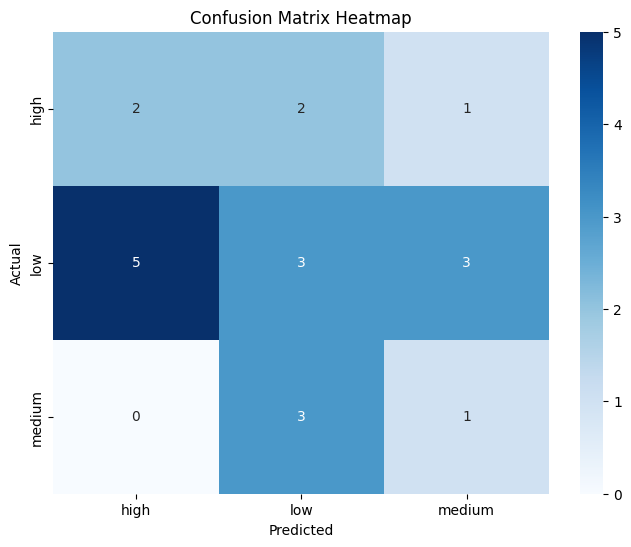

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

data = pd.read_csv("/content/plants.csv")


le_soil = LabelEncoder()
le_water = LabelEncoder()
data['soil_type_encoded'] = le_soil.fit_transform(data['soil_type'])
data['water_need_encoded'] = le_water.fit_transform(data['water_need'])

X = data[['sunlight_hours', 'watering_freq_per_week', 'soil_type_encoded']]
y = data['water_need_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_water.classes_))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_water.classes_, yticklabels=le_water.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
